# ***Preprocessing and EDA***

In [372]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
import scipy.cluster.hierarchy as shc
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [373]:
data = pd.read_csv("/content/Country-data.csv")

In [374]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [375]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [376]:
data.shape

(167, 10)

In [377]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [378]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [379]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [380]:
col = list(data.columns)
col.remove('country')

categorical_features = ['country']
numerical_features = col
print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : country
Numerical Features : child_mort exports health imports income inflation life_expec total_fer gdpp


<ipython-input-381-b6cde0946fe0>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[numerical_features[i]])
<ipython-input-381-b6cde0946fe0>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[numerical_features[i]])
<ipython-input-381-b6cde0946fe0>:5: UserWarning: 

`distplot` is a depreca

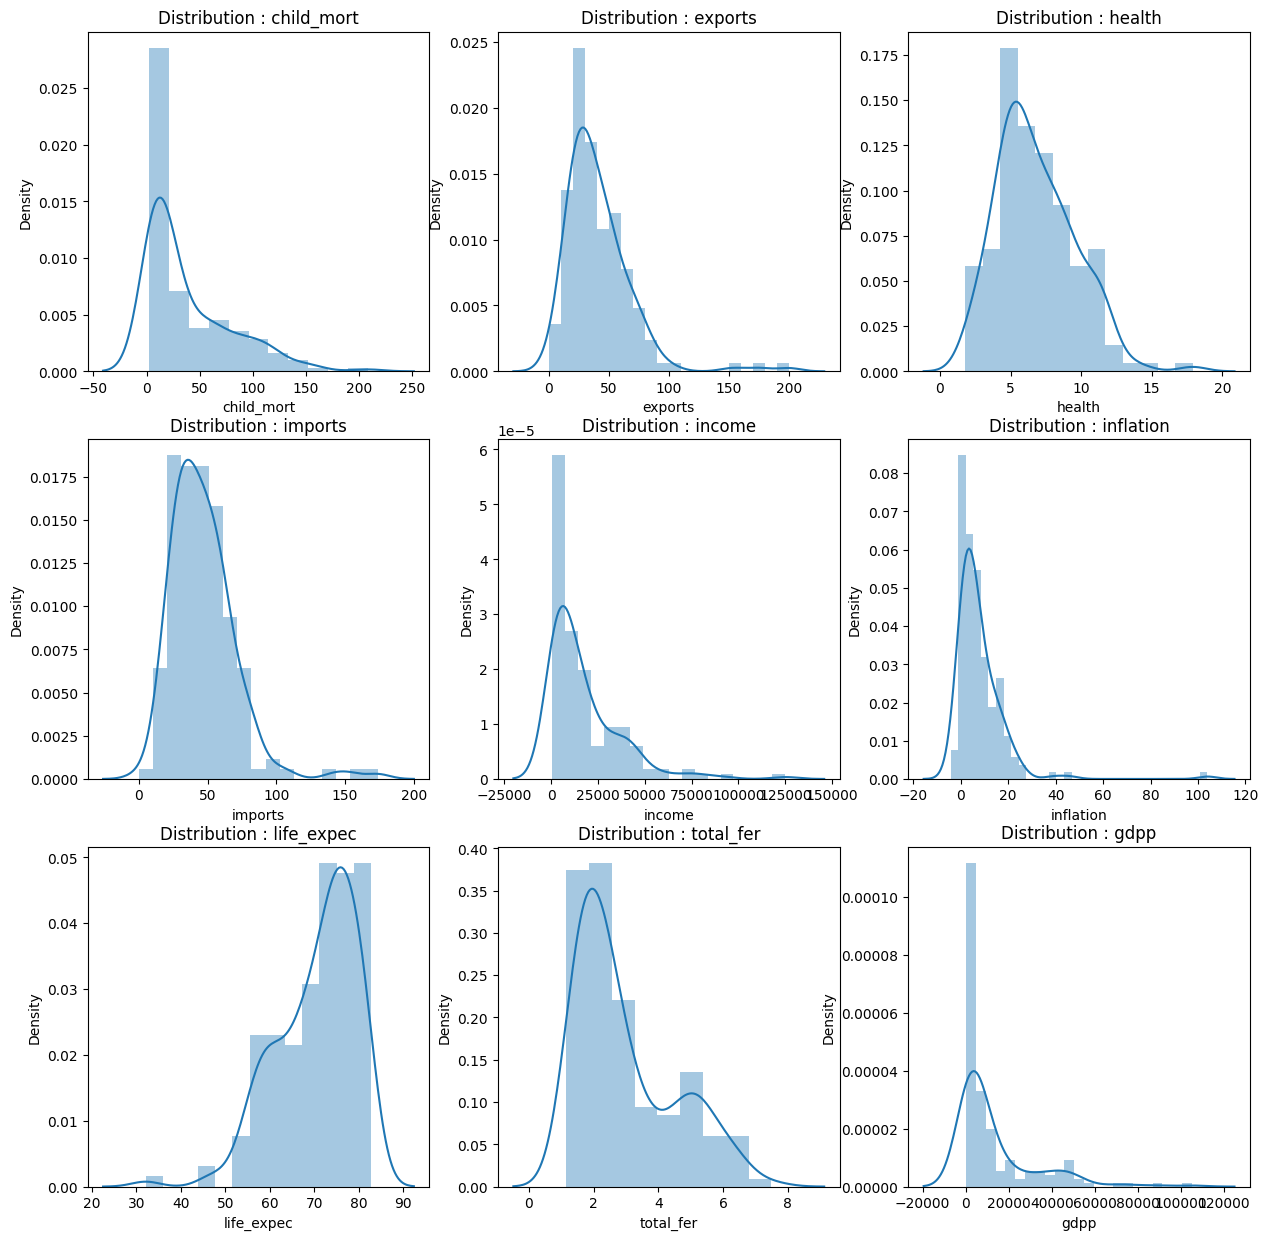

In [381]:
# Distribution Plots
fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    sns.distplot(data[numerical_features[i]])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

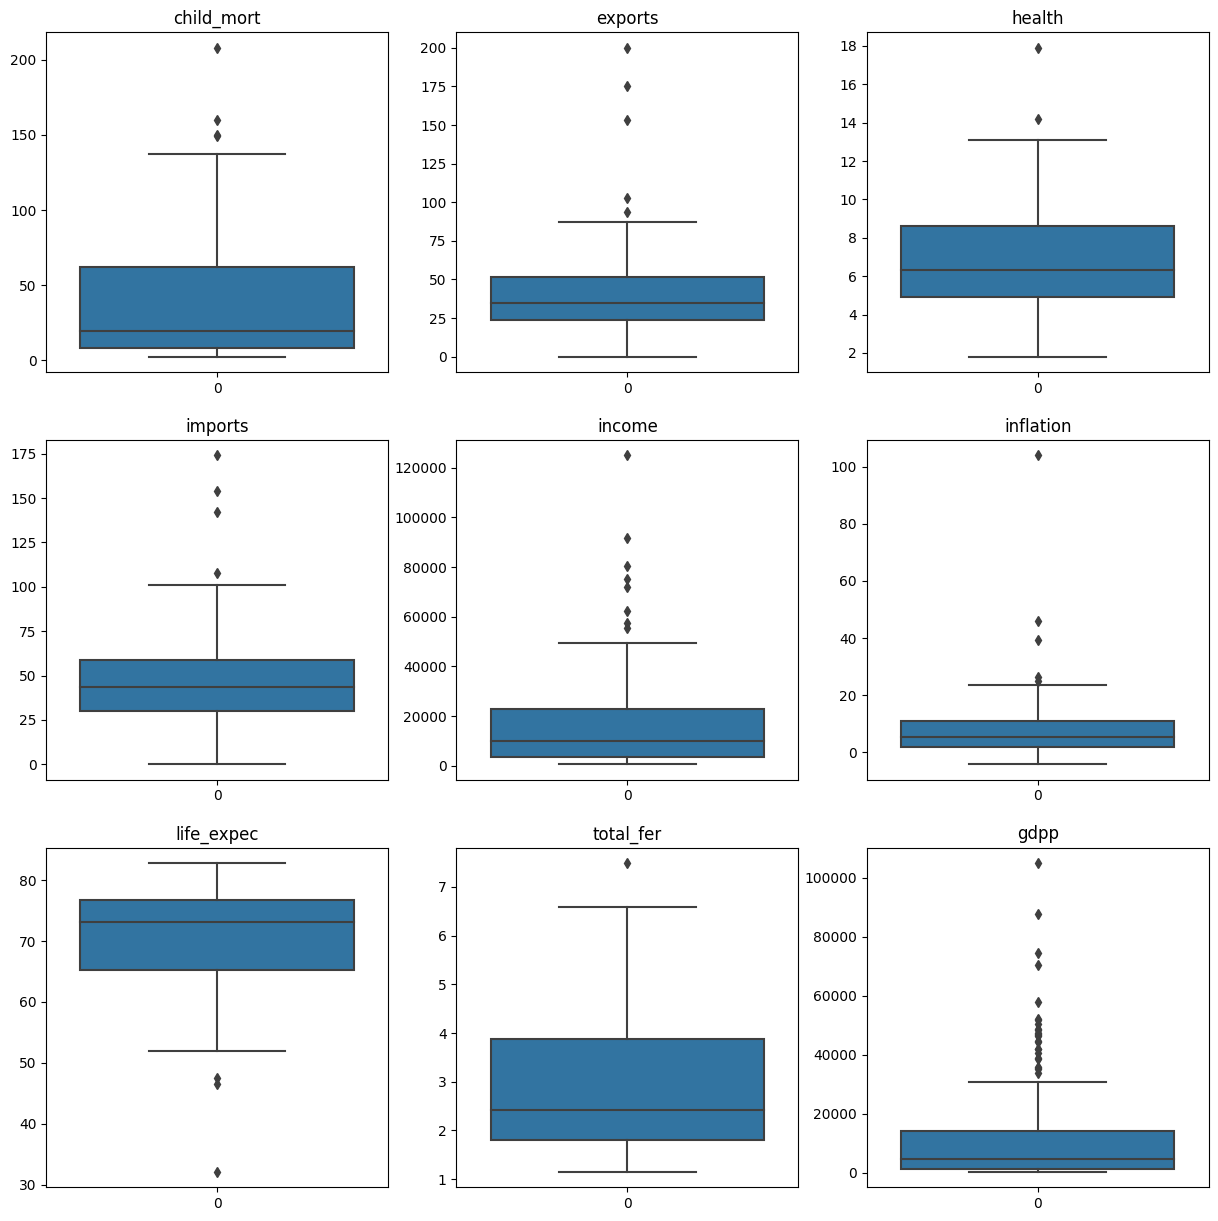

In [382]:
fig  = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    ax = sns.boxplot(data[numerical_features[i]])
    plt.title(numerical_features[i])
plt.show()

<Axes: >

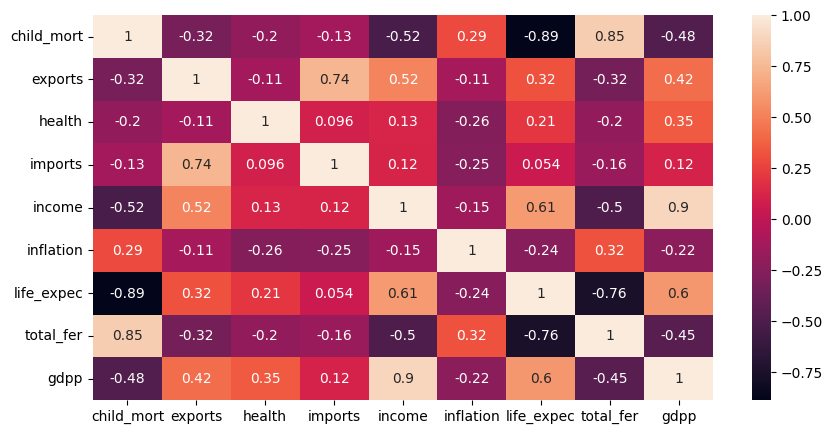

In [383]:
# Correlation Map Of Country Data  
plt.figure(figsize=(10, 5))
corr_matrix=data.corr()
sns.heatmap(corr_matrix,annot=True) 

In [384]:
# Data Scaling
# Normalization
mms = MinMaxScaler() 
# Standardization
ss = StandardScaler() 

In [385]:
# Categories of the features
df = pd.DataFrame()
df['Health'] = (data['child_mort'] / data['child_mort'].mean()) + (data['health'] / data['health'].mean()) + (data['life_expec'] / data['life_expec'].mean()) + (data['total_fer'] / data['total_fer'].mean())
df['Trade'] = (data['imports'] / data['imports'].mean()) + (data['exports'] / data['exports'].mean())
df['Finance'] = (data['income'] / data['income'].mean()) + (data['inflation'] / data['inflation'].mean()) + (data['gdpp'] / data['gdpp'].mean())

df['Health'] = mms.fit_transform(df[['Health']])
df['Trade'] = mms.fit_transform(df[['Trade']])
df['Finance'] = mms.fit_transform(df[['Finance']])
df.insert(loc = 0, value = list(data['country']), column = 'Country')
df.head()

,Country,Health,Trade,Finance
0,Afghanistan,0.625740,0.139614,0.079820
1,Albania,0.127451,0.199901,0.088756
2,Algeria,0.182485,0.186622,0.212808
3,Angola,0.661381,0.283058,0.236946
4,Antigua and Barbuda,0.116409,0.275189,0.145043


# ***PCA***

In [386]:
# Principal Component Analysis
pca_df = data.copy(deep = True)

col = list(data.columns)
col.remove('health'); col.remove('country')

pca_df['health'] = ss.fit_transform(pca_df[['health']])

for i in col:
    pca_df[i] = mms.fit_transform(pca_df[[i]])
pca_df.drop(columns = 'country',inplace = True) 
pca_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.279088,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,-0.097016,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,-0.966073,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,-1.448071,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,-0.286894,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


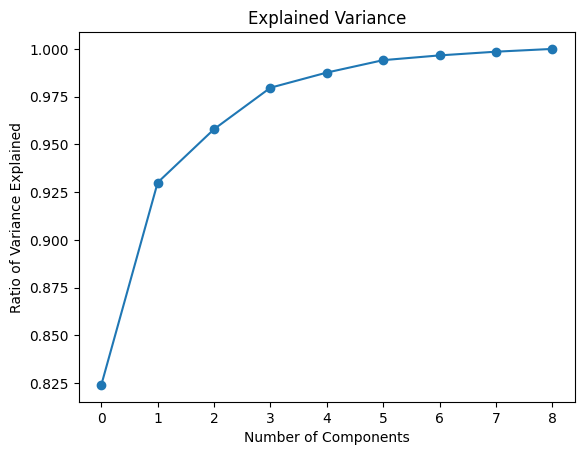

In [387]:
pca = PCA()
pca_df = pd.DataFrame(pca.fit_transform(pca_df))

# plot of Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker='o')

plt.xlabel('Number of Components')
plt.ylabel('Ratio of Variance Explained') 
plt.title('Explained Variance')

plt.show()

In [388]:
pca_df = pca_df.drop(columns = [3,4,5,6,7,8])
pca_df.head()

,0,1,2
0,0.220482,0.640048,0.086112
1,-0.080903,-0.172000,-0.208695
2,-0.961283,-0.125199,-0.126719
3,-1.505914,0.472144,0.284978
4,-0.264724,-0.237308,-0.059150


# ***KMeans***

***Normal data***

In [389]:
# K-Means Clustering
kmeans_df = df.drop(columns = ['Country'])

model = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(kmeans_df)
    model.append(km.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

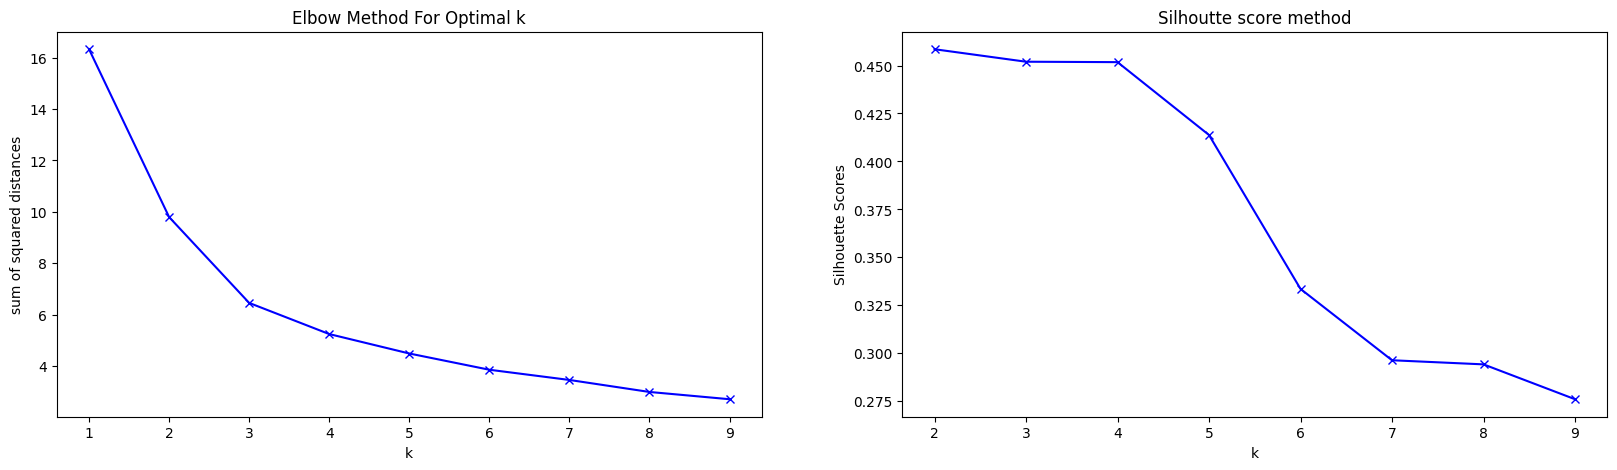

In [390]:
# Elbow curve
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(K, model, 'bx-')
plt.xlabel('k')
plt.ylabel('sum of squared distances')
plt.title('Elbow Method For Optimal k')

# Silhouette Score
k_range = range(2, 10)
scores = []

for k in k_range:
    km = KMeans(n_clusters=k, random_state=0).fit(kmeans_df)
    scores.append(metrics.silhouette_score(kmeans_df, km.labels_))

plt.subplot(1,2,2)
plt.plot(k_range, scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Scores')
plt.title('Silhoutte score method')
plt.show()

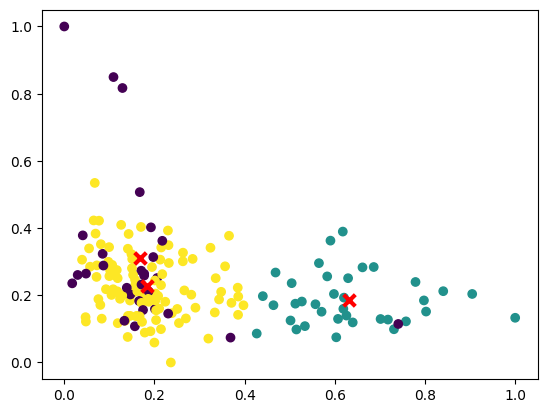

In [391]:
km = KMeans(n_clusters=3, init='random',n_init=10, max_iter=1000,tol=1e-04, random_state=0)
km.fit(kmeans_df)

# Cluster labels and centroids
labels = km.labels_
centroids = km.cluster_centers_
kmeans_df_array = kmeans_df.values

# Ploting data points 
plt.scatter(kmeans_df_array[:, 0], kmeans_df_array[:, 1], c=labels)

# Ploting centroids 
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=70, linewidths=3, color='r')
plt.show()

In [392]:
print(metrics.silhouette_score(kmeans_df, labels))

0.45197076714375445


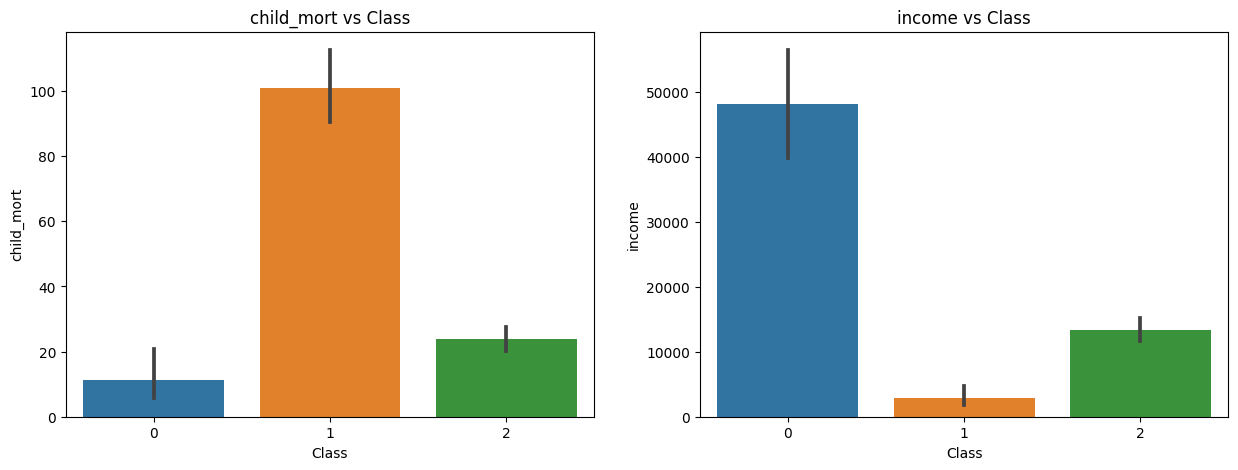

In [393]:
data['Class'] = labels
kmeans_df['Class'] = labels

# Bar plot 
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.barplot(x = 'Class', y = 'child_mort', data  = data);
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.barplot(x = 'Class', y = 'income', data  = data);
plt.title('income vs Class')

plt.show()

In [394]:
kmeans_df.insert(0,column = 'Country', value = data['country'])

kmeans_df['Class'] = kmeans_df['Class'].replace({0: 'No', 1: 'Yes', 2: 'Might'})
kmeans_df.head()

,Country,Health,Trade,Finance,Class
0,Afghanistan,0.625740,0.139614,0.079820,Yes
1,Albania,0.127451,0.199901,0.088756,Might
2,Algeria,0.182485,0.186622,0.212808,Might
3,Angola,0.661381,0.283058,0.236946,Yes
4,Antigua and Barbuda,0.116409,0.275189,0.145043,Might


***PCA Data***

In [395]:
model = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(pca_df)
    model.append(km.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

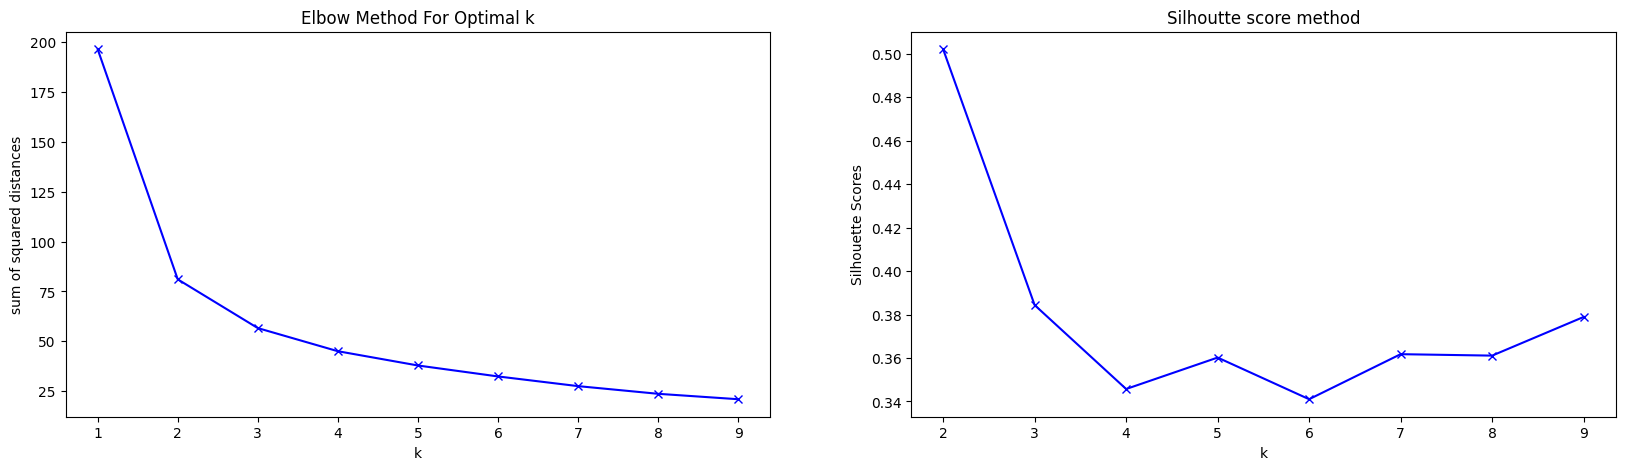

In [396]:
# Elbow curve
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(K, model, 'bx-')
plt.xlabel('k')
plt.ylabel('sum of squared distances')
plt.title('Elbow Method For Optimal k')

# Silhouette Score
k_range = range(2, 10)
scores = []

for k in k_range:
    km = KMeans(n_clusters=k, random_state=0).fit(pca_df)
    scores.append(metrics.silhouette_score(pca_df, km.labels_))

plt.subplot(1,2,2)
plt.plot(k_range, scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Scores')
plt.title('Silhoutte score method')
plt.show()

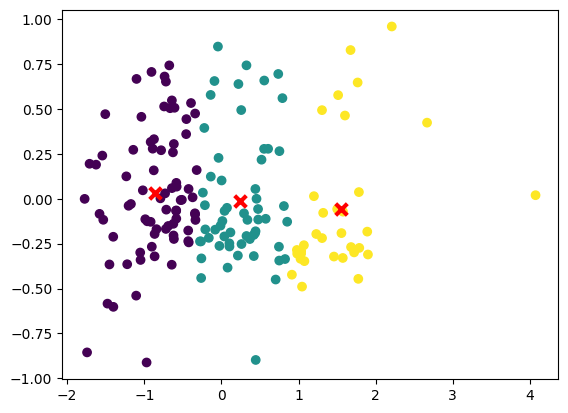

In [397]:
km = KMeans(n_clusters=3, init='random',n_init=10, max_iter=1000,tol=1e-04, random_state=0)
km.fit(pca_df)

# Cluster labels and centroids
labels = km.labels_
centroids = km.cluster_centers_
pca_df_array = pca_df.values

# Ploting data points 
plt.scatter(pca_df_array[:, 0], pca_df_array[:, 1], c=labels)

# Ploting centroids 
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=70, linewidths=3, color='r')
plt.show()

In [398]:
print(metrics.silhouette_score(pca_df, labels))

0.39202292064405597


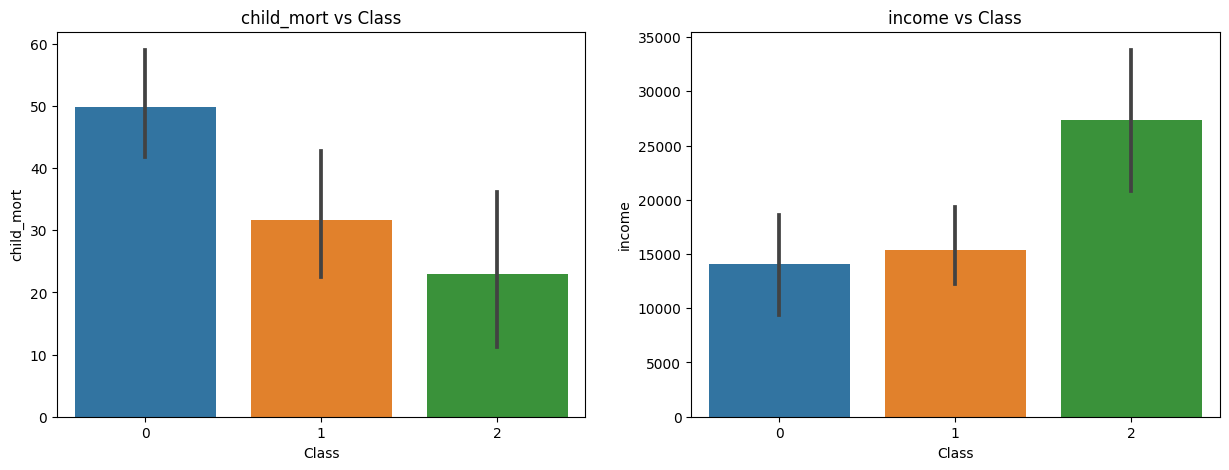

In [399]:
data = data.drop(columns = ['Class'])
data['Class'] = labels
pca_df['Class'] = labels

# Bar plot
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.barplot(x = 'Class', y = 'child_mort', data  = data);
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.barplot(x = 'Class', y = 'income', data  = data);
plt.title('income vs Class')

plt.show()

In [400]:
pca_df.insert(0,column = 'Country', value = data['country'])

pca_df['Class'] = pca_df['Class'].replace({0: 'Yes', 1: 'Might', 2: 'No'})
pca_df.head()

,Country,0,1,2,Class
0,Afghanistan,0.220482,0.640048,0.086112,Might
1,Albania,-0.080903,-0.172000,-0.208695,Might
2,Algeria,-0.961283,-0.125199,-0.126719,Yes
3,Angola,-1.505914,0.472144,0.284978,Yes
4,Antigua and Barbuda,-0.264724,-0.237308,-0.059150,Might


# ***Hierarchical Clustering***

***Normal data***

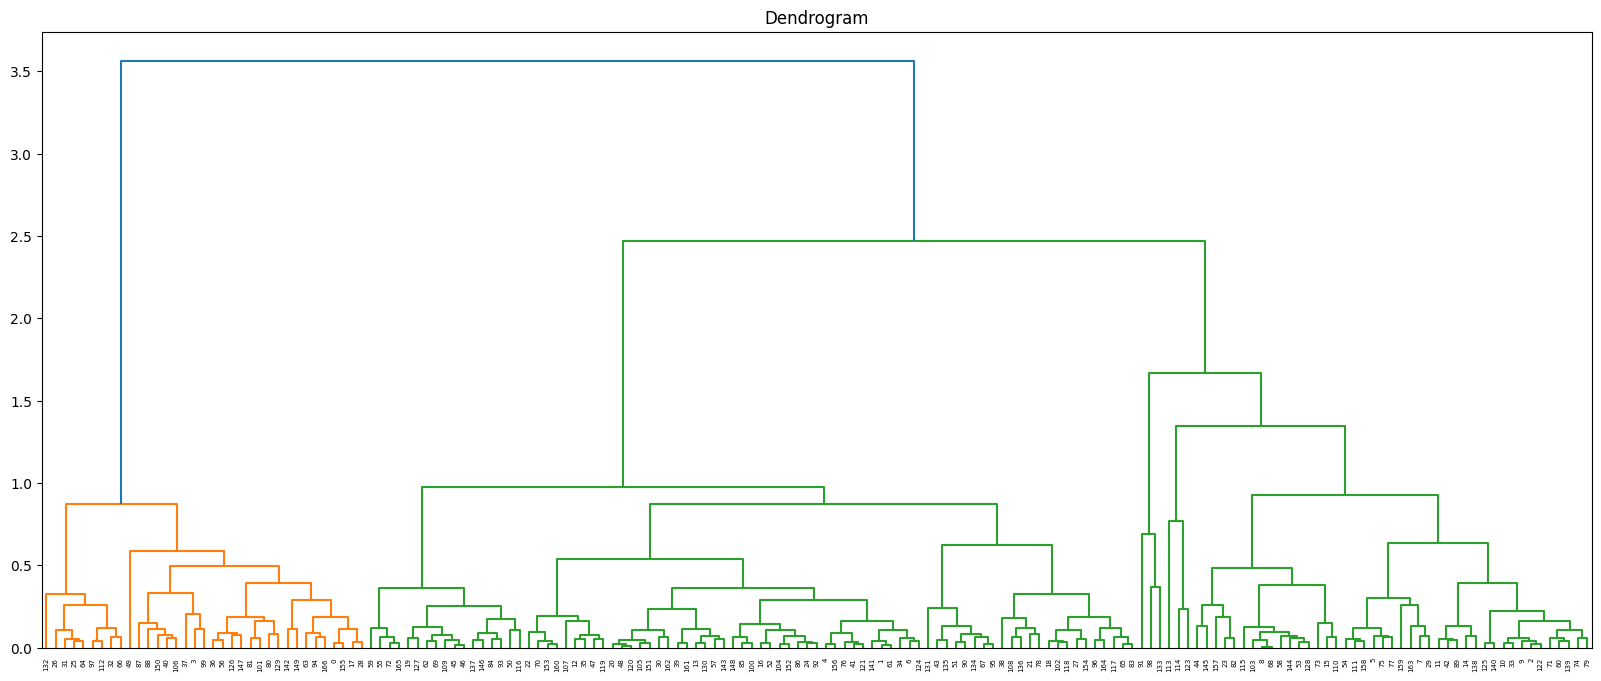

In [401]:
hc_df = df.drop(columns = ['Country'])

plt.figure(figsize=(20, 8))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(hc_df, method='ward'))

# Plot the dendrogram
plt.show()

In [402]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
Y_hc = hc.fit_predict(hc_df)

hcpreds = hc.labels_
data_hc_df = hc_df
data_hc_df.head(10)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,Health,Trade,Finance
0,0.625740,0.139614,0.079820
1,0.127451,0.199901,0.088756
2,0.182485,0.186622,0.212808
3,0.661381,0.283058,0.236946
4,0.116409,0.275189,0.145043
5,0.191168,0.092969,0.315758
6,0.079985,0.171258,0.100914
7,0.156578,0.107714,0.461966
8,0.177187,0.264032,0.438706
9,0.202379,0.205122,0.212201


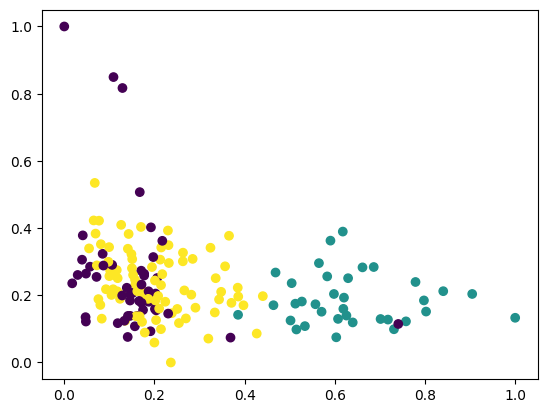

In [403]:
hc_df_array = data_hc_df.values

plt.scatter(hc_df_array[:, 0], hc_df_array[:, 1], c=hcpreds, cmap='viridis')
plt.show()

In [404]:
print(metrics.silhouette_score(data_hc_df, hcpreds))

0.37795779229139226


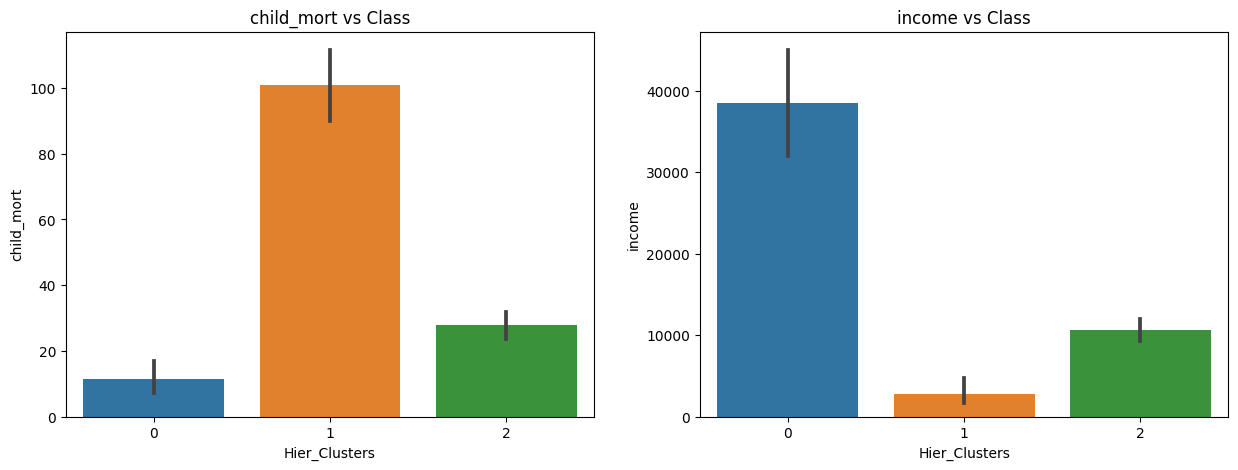

In [405]:
data_hc_df['Hier_Clusters'] = hcpreds
data = data.drop(columns = ['Class'])
data['Hier_Clusters'] = hcpreds

# Bar plot 
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.barplot(x = 'Hier_Clusters', y = 'child_mort', data  = data);
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.barplot(x = 'Hier_Clusters', y = 'income', data  = data);
plt.title('income vs Class')

plt.show()

In [406]:
data_hc_df.insert(0,column = 'Country', value = data['country'])

data_hc_df['Hier_Clusters'] = data_hc_df['Hier_Clusters'].replace({0: 'No', 1: 'Yes', 2: 'Might'})
data_hc_df.head()

,Country,Health,Trade,Finance,Hier_Clusters
0,Afghanistan,0.625740,0.139614,0.079820,Yes
1,Albania,0.127451,0.199901,0.088756,Might
2,Algeria,0.182485,0.186622,0.212808,No
3,Angola,0.661381,0.283058,0.236946,Yes
4,Antigua and Barbuda,0.116409,0.275189,0.145043,Might


***PCA Data***

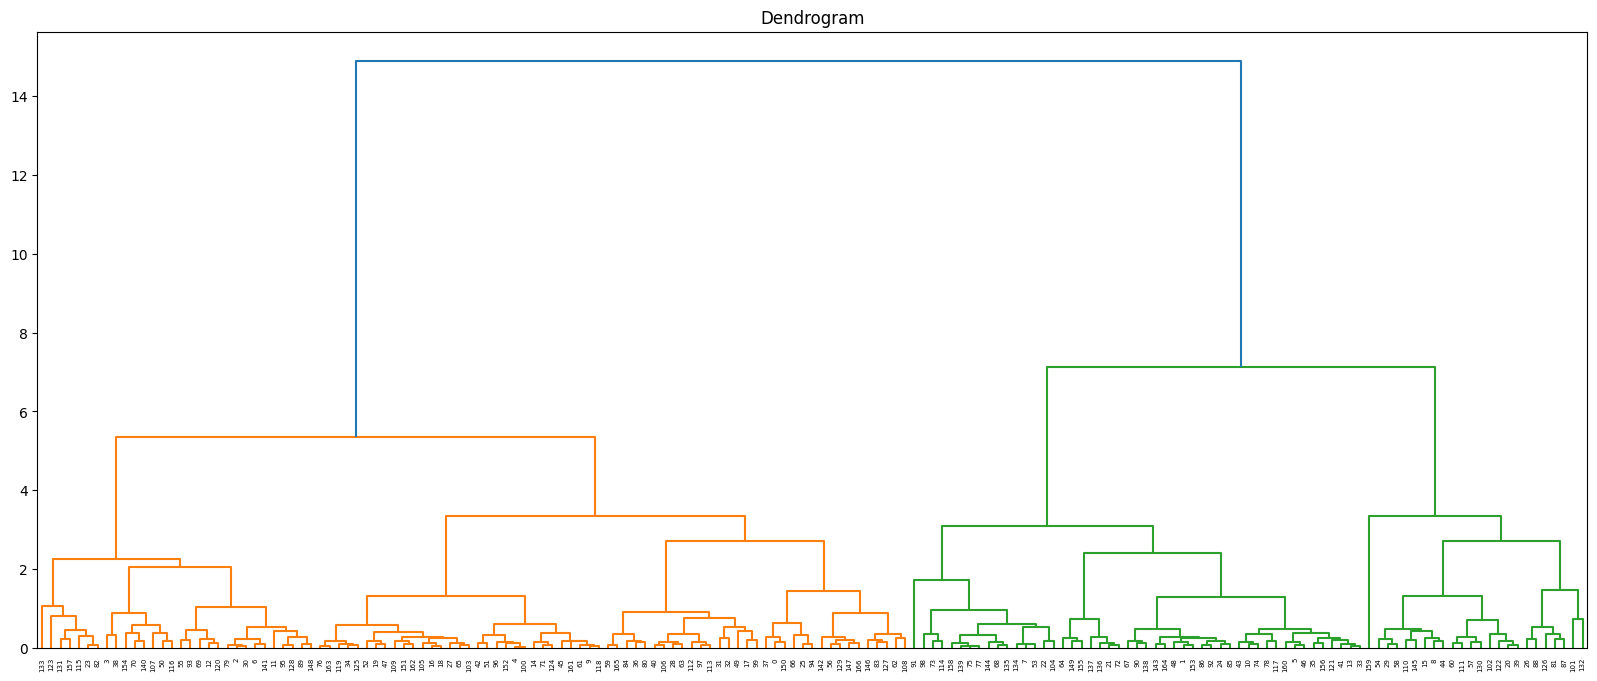

In [407]:
pca_df = pca_df.drop(columns = ['Country','Class'])

plt.figure(figsize=(20, 8))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(pca_df, method='ward'))

# Plot the dendrogram
plt.show()

In [408]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
Y_hc = hc.fit_predict(pca_df)

hcpreds = hc.labels_
data_pca_df = pca_df
data_pca_df.head(10)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,0,1,2
0,0.220482,0.640048,0.086112
1,-0.080903,-0.172000,-0.208695
2,-0.961283,-0.125199,-0.126719
3,-1.505914,0.472144,0.284978
4,-0.264724,-0.237308,-0.059150
5,0.475055,-0.056807,-0.211478
6,-0.865958,-0.195852,-0.234925
7,0.749657,-0.344202,0.003910
8,1.573812,-0.329645,0.101313
9,-0.341213,-0.086971,-0.116877


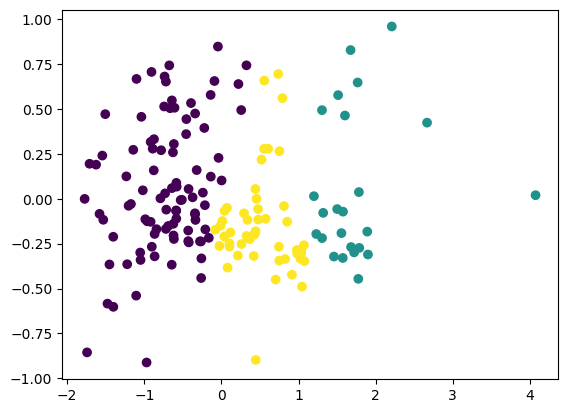

In [409]:
hc_df_array = data_pca_df.values

plt.scatter(hc_df_array[:, 0], hc_df_array[:, 1], c=hcpreds, cmap='viridis')
plt.show()

In [410]:
print(metrics.silhouette_score(data_pca_df, hcpreds))

0.4046355541546756


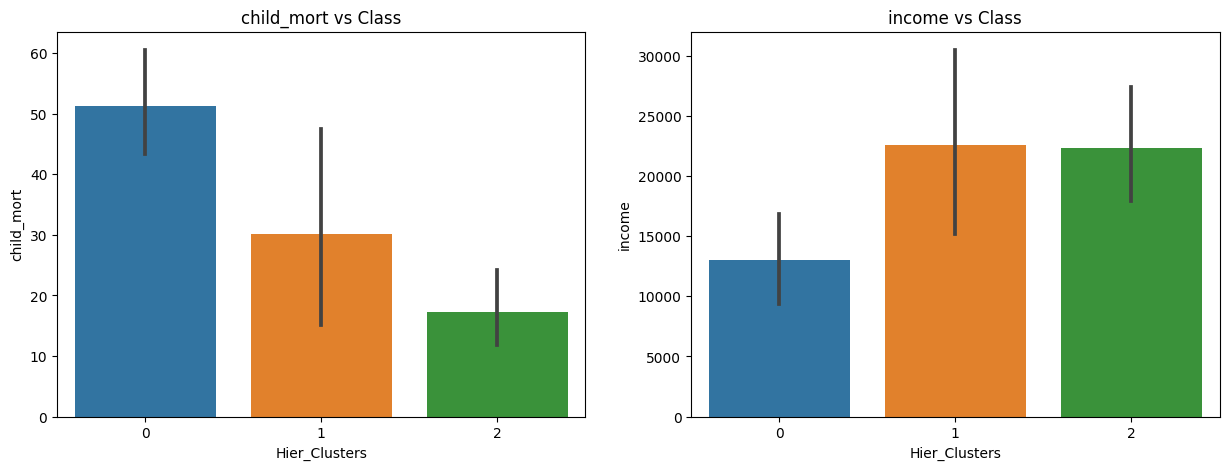

In [411]:
data_pca_df['Hier_Clusters'] = hcpreds
data = data.drop(columns = ['Hier_Clusters'])
data['Hier_Clusters'] = hcpreds

# Bar plot 
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.barplot(x = 'Hier_Clusters', y = 'child_mort', data  = data);
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.barplot(x = 'Hier_Clusters', y = 'income', data  = data);
plt.title('income vs Class')

plt.show()

In [412]:
pca_df.insert(0,column = 'Country', value = data['country'])

pca_df['Hier_Clusters'] = pca_df['Hier_Clusters'].replace({0: 'Yes', 1: 'Might', 2: 'No'})
pca_df.head()

,Country,0,1,2,Hier_Clusters
0,Afghanistan,0.220482,0.640048,0.086112,Yes
1,Albania,-0.080903,-0.172000,-0.208695,No
2,Algeria,-0.961283,-0.125199,-0.126719,Yes
3,Angola,-1.505914,0.472144,0.284978,Yes
4,Antigua and Barbuda,-0.264724,-0.237308,-0.059150,Yes


# ***DBSCAN***

***Normal Data***

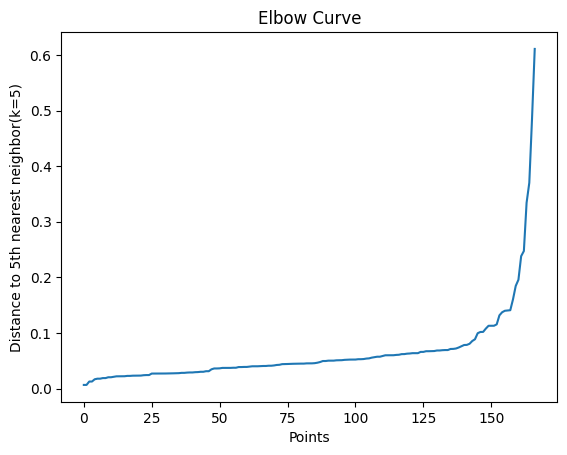

In [413]:
db_df = df.drop(columns = ['Country'])

# Computing the distance to the kth nearest neighbor
k = 5
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(db_df)
distances, indices = neighbors_fit.kneighbors(db_df)

# Sorting the distances in descending order
distances = np.sort(distances, axis=0)
distances = distances[:,1]

# Elbow curve
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Distance to 5th nearest neighbor(k=5)')
plt.title('Elbow Curve')
plt.show()

In [414]:
dbscan = DBSCAN(eps=0.08, min_samples=5)
clusters = dbscan.fit_predict(db_df)

labels = dbscan.labels_

print("Cluster assignments:\n", labels)

Cluster assignments:
 [ 0  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  0  1  1  1  1  1 -1
  1 -1 -1  1  0  1  1 -1 -1  1  1  1  0 -1 -1  1  0  1 -1  1  1  1  1  1
  1 -1  1  1  1  1  1 -1  0  1  1 -1  1  1  1  0 -1  1 -1  1  1  1  1  1
 -1 -1  1  1  1  1  1  1  1  0 -1  1  1  1  1 -1 -1 -1  1 -1  1  1  0  1
  1 -1 -1 -1  1 -1  1  1  1  1  0 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1  1  1
  1  1  1 -1  1 -1  0  1  1  0  1 -1 -1 -1  1  1  1  1 -1  1  1  1 -1  1
  1 -1  1  0  1 -1 -1  1  1  1  1  0  1 -1  1 -1  1  1  1 -1  1 -1  0]


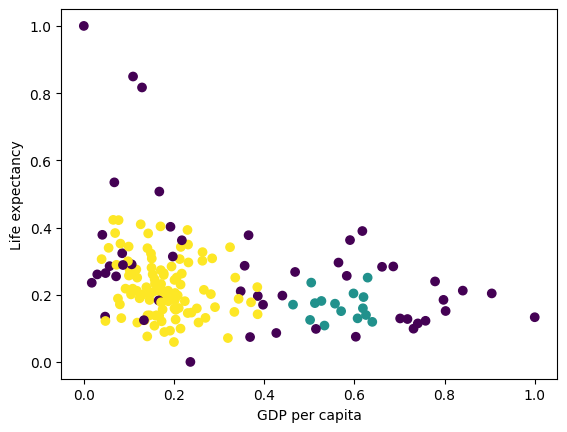

In [415]:
plt.scatter(db_df.iloc[:,0], db_df.iloc[:,1], c=clusters)
plt.xlabel('GDP per capita')
plt.ylabel('Life expectancy')
plt.show()

In [416]:
predictions_db = pd.Series(labels)
predictions_db

0      0
1      1
2      1
3     -1
4      1
      ..
162    1
163   -1
164    1
165   -1
166    0
Length: 167, dtype: int64

In [417]:
unique_labels, counts = np.unique(labels, return_counts=True)
percentages = counts / len(labels) * 100

# value counts and percentages
print("Value counts:")
for i, label in enumerate(unique_labels):
    print(f"Class {label}: {counts[i]}")
print("")

print("Percentages:")
for i, label in enumerate(unique_labels):
    print(f"Class {label}: {percentages[i]:.2f}%")

Value counts:
Class -1: 49
Class 0: 15
Class 1: 103

Percentages:
Class -1: 29.34%
Class 0: 8.98%
Class 1: 61.68%


In [418]:
print('Silhouette Score:', silhouette_score(db_df, predictions_db))

Silhouette Score: 0.24109785763130062


In [419]:
db_df['Class'] = predictions_db
data = data.drop(columns = ['Hier_Clusters'])
data['Class'] = predictions_db

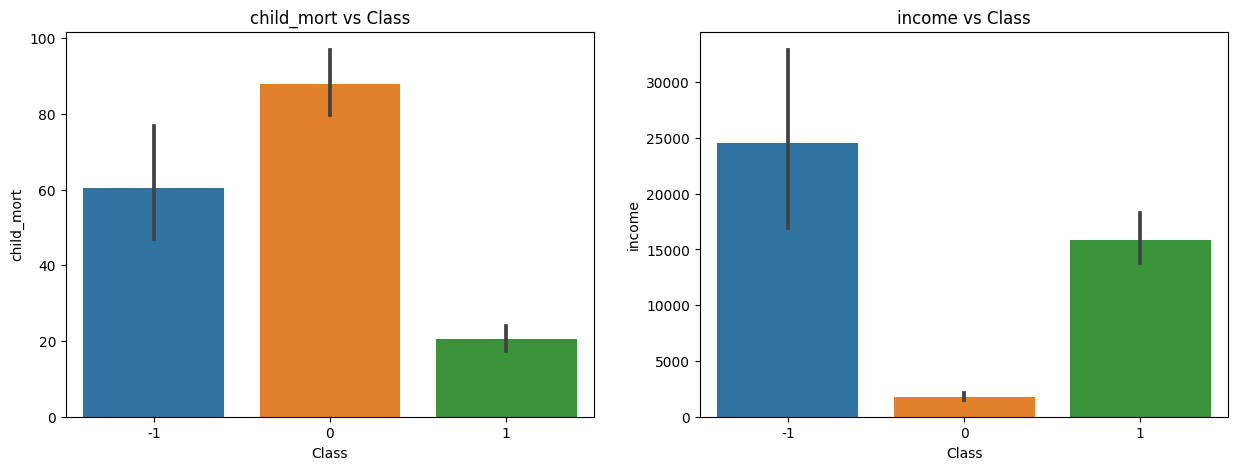

In [420]:
# Bar plot
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.barplot(x = 'Class', y = 'child_mort', data  = data);
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.barplot(x = 'Class', y = 'income', data  = data);
plt.title('income vs Class')

plt.show()

In [421]:
db_df.insert(0,column = 'Country', value = data['country'])

db_df['Class'] = db_df['Class'].replace({-1: 'Noise', 0: 'Yes', 1: 'No'})
db_df.head()

,Country,Health,Trade,Finance,Class
0,Afghanistan,0.625740,0.139614,0.079820,Yes
1,Albania,0.127451,0.199901,0.088756,No
2,Algeria,0.182485,0.186622,0.212808,No
3,Angola,0.661381,0.283058,0.236946,Noise
4,Antigua and Barbuda,0.116409,0.275189,0.145043,No


***PCA Data***

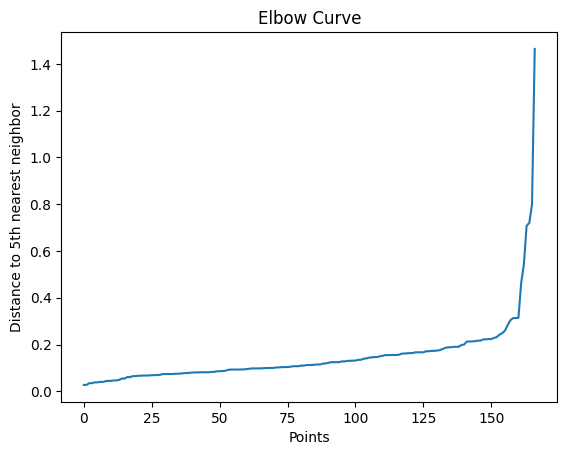

In [422]:
pca_df = pca_df.drop(columns = ['Country','Hier_Clusters'])

# Computing the distance to the kth nearest neighbor
k = 5
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(pca_df)
distances, indices = neighbors_fit.kneighbors(pca_df)

# Sorting the distances in descending order
distances = np.sort(distances, axis=0)
distances = distances[:,1]

# Elbow curve
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Distance to 5th nearest neighbor')
plt.title('Elbow Curve')
plt.show()

In [423]:
dbscan = DBSCAN(eps=0.2, min_samples=6)
clusters = dbscan.fit_predict(pca_df)

labels = dbscan.labels_

print("Cluster assignments:\n", labels)

Cluster assignments:
 [-1  0  0 -1  0  0  0 -1 -1  0  0 -1 -1  0  0 -1  0 -1  0  0 -1 -1 -1 -1
  0 -1 -1  0  1 -1  0 -1  1  0  0  0 -1 -1 -1 -1  1  0 -1  0 -1  0  0  0
  0 -1 -1  0  0  2 -1 -1 -1 -1 -1 -1 -1  0  0  1 -1  0 -1  0  2  0 -1  0
 -1 -1  0  2  0  2  0  0 -1 -1 -1  0 -1  0  0 -1 -1 -1  0 -1  0 -1 -1 -1
  0  1 -1 -1  0 -1 -1  0 -1  0  1 -1 -1  0 -1  2  1  1 -1 -1 -1  0  0  0
 -1  0 -1 -1  0  0 -1  0  0 -1 -1 -1 -1 -1 -1  2 -1 -1  0  2 -1  0 -1  0
  2 -1  0 -1 -1 -1 -1  0  0  0 -1 -1  0 -1  2 -1  0  0  0  0  0  0 -1]


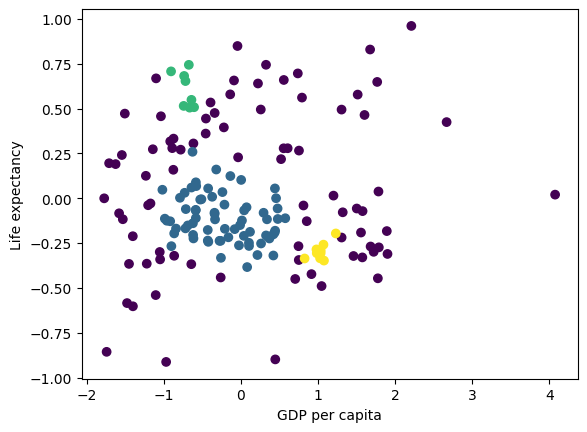

In [424]:
plt.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1], c=clusters)
plt.xlabel('GDP per capita')
plt.ylabel('Life expectancy')
plt.show()

In [425]:
predictions_db = pd.Series(labels)
predictions_db

0     -1
1      0
2      0
3     -1
4      0
      ..
162    0
163    0
164    0
165    0
166   -1
Length: 167, dtype: int64

In [426]:
unique_labels, counts = np.unique(labels, return_counts=True)
percentages = counts / len(labels) * 100

# Print the value counts and percentages
print("Value counts:")
for i, label in enumerate(unique_labels):
    print(f"Class {label}: {counts[i]}")
print("")

print("Percentages:")
for i, label in enumerate(unique_labels):
    print(f"Class {label}: {percentages[i]:.2f}%")

Value counts:
Class -1: 82
Class 0: 68
Class 1: 8
Class 2: 9

Percentages:
Class -1: 49.10%
Class 0: 40.72%
Class 1: 4.79%
Class 2: 5.39%


In [427]:
print('Silhouette Score:', silhouette_score(pca_df, predictions_db))

Silhouette Score: -0.07


In [428]:
pca_df['Class'] = predictions_db
data = data.drop(columns = ['Class'])
data['Class'] = predictions_db

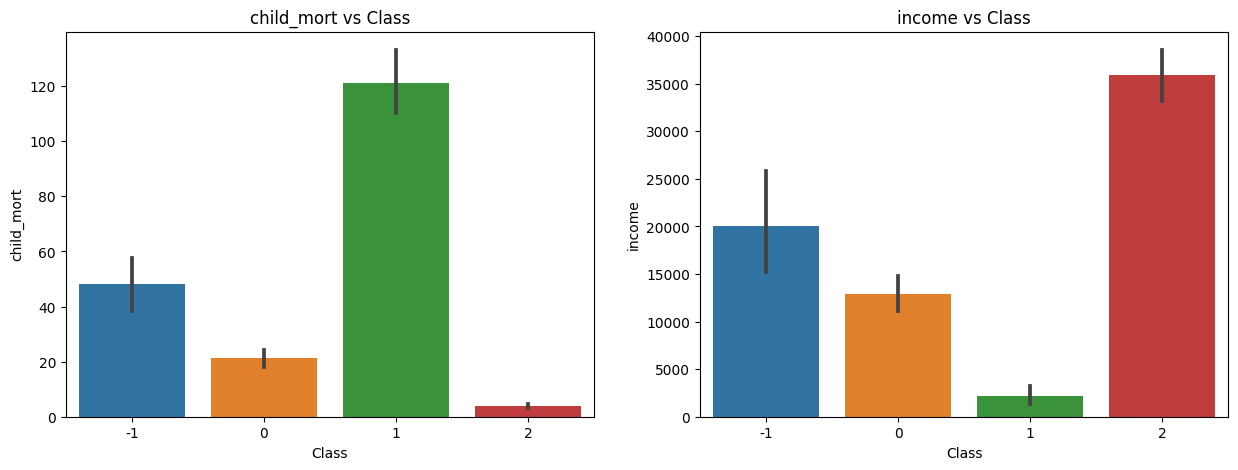

In [429]:
# Bar plot
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.barplot(x = 'Class', y = 'child_mort', data  = data);
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.barplot(x = 'Class', y = 'income', data  = data);
plt.title('income vs Class')

plt.show()

In [430]:
pca_df.insert(0,column = 'Country', value = data['country'])

pca_df['Class'] = pca_df['Class'].replace({-1: 'Noise', 0: 'Might', 1: 'Yes',2: 'No'})
pca_df.head()

,Country,0,1,2,Class
0,Afghanistan,0.220482,0.640048,0.086112,Noise
1,Albania,-0.080903,-0.172000,-0.208695,Might
2,Algeria,-0.961283,-0.125199,-0.126719,Might
3,Angola,-1.505914,0.472144,0.284978,Noise
4,Antigua and Barbuda,-0.264724,-0.237308,-0.059150,Might
